# IRIS Exporatory data analysis

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA

sns.set(color_codes=True)

In [66]:
%matplotlib inline

## Read iris data

In [8]:
df_raw = pd.read_csv("../model_data/01_source/iris.csv")

In [9]:
df_raw.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [27]:
col_names = list(df_raw.columns)
col_names

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [82]:
target = col_names[-1:]
covariables = col_names[:-1]
print(target, covariables)

['species'] ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


In [34]:
df_raw.count()

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
species         150
dtype: int64

## Missing data

In [26]:
df_raw.isnull().mean()

sepal_length    0.0
sepal_width     0.0
petal_length    0.0
petal_width     0.0
species         0.0
dtype: float64

There is no missing data, phew!

## Explore target variable

In [36]:
df_raw.groupby(target).count()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


In [53]:
df_raw.groupby(target).describe()

sepal_length                                              \
                  count   mean       std  min    25%  50%  75%  max   
species                                                               
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal_width         ... petal_length      petal_width         \
                 count   mean  ...          75%  max       count   mean   
species                        ...                                        
setosa            50.0  3.418  ...        1.575  1.9        50.0  0.244   
versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                               
                 std  min  25%  50%  75%  max  
species                                        
setosa      0.107210  0.1  0.2  0.2  0.3  0.6  
versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [58]:
median = lambda x: x.quantile(q=0.5)
median.__name__ = "median"
q1 = lambda x: x.quantile(q=0.25)
q1.__name__ = "q1"
q3 = lambda x: x.quantile(q=0.75)
q3.__name__ = "q3"

covariables[0]df_raw.groupby(target).agg({"sepal_length": ["count", "min", q1, median, q3, "max", "mean", "std"]})

sepal_length                                              
                  count  min     q1 median   q3  max   mean       std
species                                                              
setosa               50  4.3  4.800    5.0  5.2  5.8  5.006  0.352490
versicolor           50  4.9  5.600    5.9  6.3  7.0  5.936  0.516171
virginica            50  4.9  6.225    6.5  6.9  7.9  6.588  0.635880

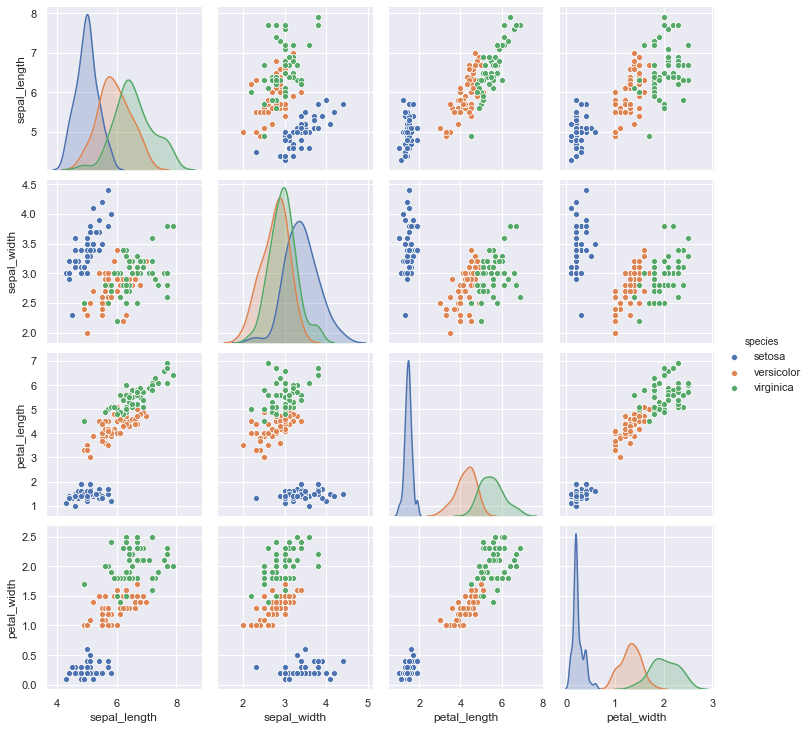

In [103]:
sns.pairplot(df_raw, hue="species");

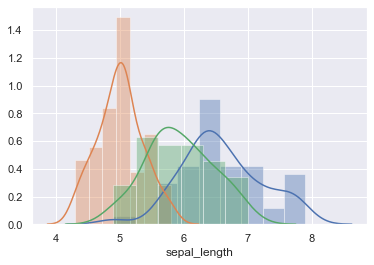

In [105]:
var_plot = covariables[0]
df_plot = df_raw[target + [var_plot]]

# sns.distplot(df_plot[var_plot]).set_title(f"Distribution of {var_plot}")
for level in set(df_plot[target[0]]):
    sns.distplot(df_plot.loc[df_plot[target[0]] == level][var_plot])




## Feature engineering

In [131]:
pca = PCA(1)
df_pca = pca.fit_transform(df_raw[covariables])
pca.explained_variance_ratio_

array([0.92461621])

In [149]:
pca.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393]])

In [155]:
df_pp = df_raw.copy()
df_pp["pca_comp1"] = df_pca[:, 0]

In [158]:
df_raw.head()

,sepal_length,sepal_width,petal_length,petal_width,species,pca_comp1
0,5.1,3.5,1.4,0.2,setosa,-2.684207
1,4.9,3.0,1.4,0.2,setosa,-2.715391
2,4.7,3.2,1.3,0.2,setosa,-2.889820
3,4.6,3.1,1.5,0.2,setosa,-2.746437
4,5.0,3.6,1.4,0.2,setosa,-2.728593


In [159]:
df_pp.describe()

,sepal_length,sepal_width,petal_length,petal_width,pca_comp1
count,150.000000,150.000000,150.000000,150.000000,1.500000e+02
mean,5.843333,3.054000,3.758667,1.198667,5.358676e-16
std,0.828066,0.433594,1.764420,0.763161,2.055442e+00
min,4.300000,2.000000,1.000000,0.100000,-3.225200e+00
25%,5.100000,2.800000,1.600000,0.300000,-2.530159e+00
50%,5.800000,3.000000,4.350000,1.300000,5.533290e-01
75%,6.400000,3.300000,5.100000,1.800000,1.549463e+00
max,7.900000,4.400000,6.900000,2.500000,3.794687e+00


## Save processed data

In [161]:
df_pp.to_parquet('../model_data/02_preprocess/pp_iris.parquet', index=False)